# ANÀLISI D'UN DATASET

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

## Introducció

El tractament de dades avui en dia és una eina fonamental per prendre decisions precises de manera automàtica. Tot i així, com les decissions les pren una màquina seguint uns patrons marcats per un aprenentatge previ, es poden produir alguns errors.

Aquest projecte tracta d'analitzar i explorar un conjunt de dades de costos mèdics en assegurances de salud d'Estats Units per trobar respostes a preguntes a través de probes d'hipòtesis estadístiques.

## Descripció de les dades

In [1]:
# Carregant les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Per tal de realitzar l'estudi sobre els costos mèdics en una assegurança concreta, s'ha fet us d'un conjunt de dades anomenat US Health Insurance EDA (European Defence Agency) extret del nucli de Kaggle

In [23]:
# Carregant el conjunt de dades
dataset = pd.read_csv(r'.\insurance.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.head()

Mida de les dades: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Entenent els tipus de variables de cada atribut
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Després d'analitzar les classes de variables que son els atributs els quals s'analitzaràn posteriorment, es pot observar com hi ha varies dades tipus object que, per facilitzar el procés d'estudi, es transformaràn a dades binàries implementant el *one-hot encoding*, estratègia que implementa generar una columna per cada valor possible i omplir amb 1 i 0 se 
estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0

In [24]:
# Convertint cadenes a dades numèriques per poder més endavant poder treballar amb elles i fem one-hot encoding amb regió
dataset = pd.concat([dataset, pd.get_dummies(dataset.region, prefix='region')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset.smoker, drop_first=True, prefix='smoker')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset.sex, drop_first=True, prefix='is')], axis=1)
#dataset = dataset.drop(['region'], axis=1)
dataset = dataset.drop(['smoker'], axis=1)
dataset = dataset.drop(['sex'], axis=1)
dataset.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
0,19,27.900,0,southwest,16884.92400,0,0,0,1,1,0
1,18,33.770,1,southeast,1725.55230,0,0,1,0,0,1
2,28,33.000,3,southeast,4449.46200,0,0,1,0,0,1
3,33,22.705,0,northwest,21984.47061,0,1,0,0,0,1
4,32,28.880,0,northwest,3866.85520,0,1,0,0,0,1


In [5]:
dataset.describe()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900,0.204783,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995,0.403694,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### INFORMACIÓ DELS ATRIBUTS

La majoria de factors que afecten a la quantitat de cost invertit en l'assegurança mèdica no són controlables. Tot i així, és bo tenir una bona comprensió de quins són:


* ***age***: Variable de tipus int, ens informa de l'edat de cada usuari de l'assegurança
* ***sex***: Variable tipus binària que indica el sexe de l'usuari. (1 = femenino / 0 = masculino)
* ***bmi***: Variable de tipus int, proporciona informació de l'índex de massa corporal, ja que es una relació entre l'altura i el pes i proporciona una millor comprensió del cos. (idealment té valors entre 18.5 i 24.9)
* ***children***: Variable de tipus int, és el número de fills coberts per la seguretat social.
* ***smoker***: Variable de tipus binària, indica si l'usuari és fumador. (1 = si / 0 = no)
* ***region***: Variable de tipus int, pren un valor entre 1 i 4 segons l'àrea residencial del beneficiari (1 = *southwest* / 2 = *southeast* / 3 = *northwest* / 4 = *northeast*)
* ***charges***: Variable de tipus double, són els costos mèdics individuals facturats per l'assegurança per usuari.

Un cop analitzats els atributs, es decideix quin atribut convertir en varibale resposta. En aquest cas, s'aproximarà el valor de la variable *charges* mitjançant la combinació lineal de les altres sis característiques.

In [6]:
X = dataset.drop('charges', axis = 1)
Y = dataset['charges']

### INFORMACIÓ DE LA VARIABLE RESPOSTA

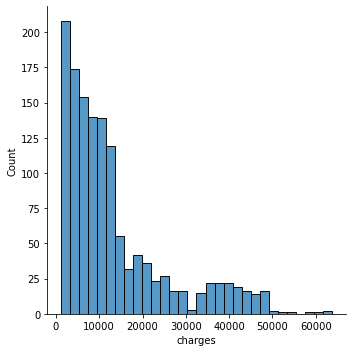

In [7]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU: EXPONENCIAL
sns.displot(dataset, x="charges")

In [8]:
dataset['charges_log'] = np.log(dataset['charges'])
dataset['charges_log'] = (dataset['charges_log'] - np.mean(dataset['charges_log']))/np.var(dataset['charges_log'])
dataset.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male,charges_log
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0.752183
1,18,33.770,1,1725.55230,0,0,1,0,0,1,-1.947402
2,28,33.000,3,4449.46200,0,0,1,0,0,1,-0.826277
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1.064546
4,32,28.880,0,3866.85520,0,1,0,0,0,1,-0.992382


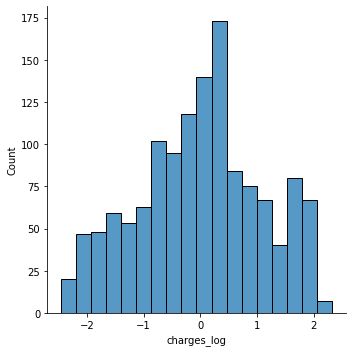

In [9]:
sns.displot(dataset, x="charges_log")

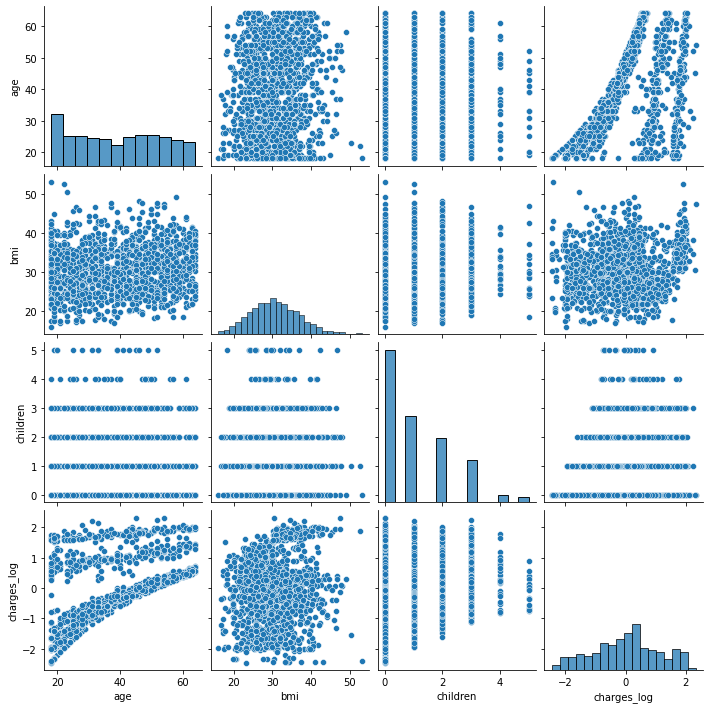

In [20]:
sns.pairplot(dataset.loc[:, ['age','bmi','children','charges_log']])

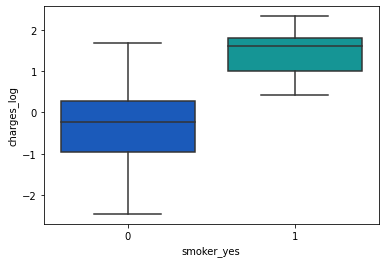

In [21]:
sns.boxplot(x='smoker_yes',y='charges_log',data=dataset,palette='winter')

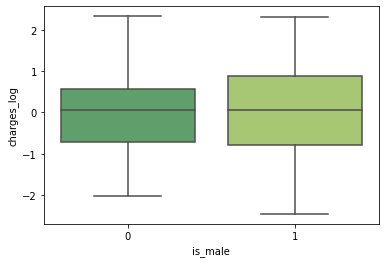

In [22]:
sns.boxplot(x='is_male',y='charges_log',data=dataset,palette='summer')

In [ ]:
sns.boxplot(x='smoker_yes',y='charges_log',data=dataset,palette='winter')

In [12]:
#ARA MIREM ELS OUTLIERS AMB UN BOXPLOT de l'atribut objectiu


def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = dataset.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = dataset[x].skew()
    Q1 = dataset[x].quantile(0.25)
    Q3 = dataset[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((dataset[x] < (Q1 - 1.5 * IQR)) | (dataset[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {dataset[x].mean()}')
    print(f'Median {x.capitalize()} = {dataset[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

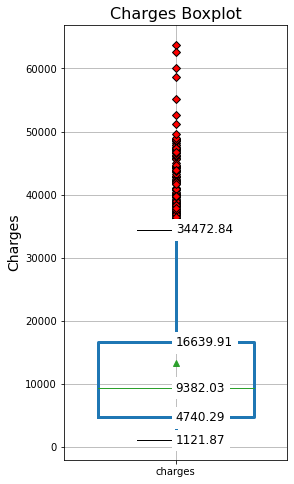

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [13]:
box_plot('charges')

In [14]:
#ANALITZEM UNA MICA ELS OUTLIERS PER ENTENDRE COM SÓN i mirar si poden ser un error d'escriptura o són acceptables
# Who is paying the highest charges?
dataset[dataset['charges'] == dataset['charges'].max()]

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male,charges_log
543,54,47.41,0,63770.42801,0,0,1,0,1,0,2.324997


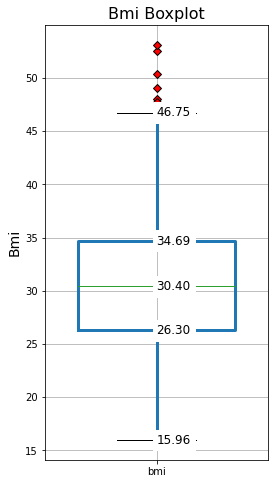

Mean Bmi = 30.663396860986538
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male,charges_log
1317,18,53.13,0,1163.4627,0,0,1,0,0,1,-2.413904


In [15]:
#analitzem altres outliers, com per ex els del bmi
box_plot('bmi')
dataset[dataset['bmi'] == dataset['bmi'].max()]

In [16]:
#ARA MIREM LA DISTRIBUCIÓ D'ALGUNES VARIABLES
def distr(data, x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    Q4 = np.var(data[x])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'Q4                    : {Q4}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.show()

In [17]:
#MIREM LA DISTRIBUCIO DE LA VARIABLE bmi i de la edat
#posar titols als plots
distr(dataset[dataset["sex"] == '1'], 'bmi') #1 = dones
distr(dataset[dataset["sex"] == '0'], 'bmi') #0 = homes
distr(dataset[dataset["sex"] == '1'], 'age') #1 = dones
distr(dataset[dataset["sex"] == '0'], 'age') #0 = homes

KeyError: 'sex'

In [ ]:
#NORMALITZEM LA COLUMNA DE DADES DE LA VARIABLE OBJECTIU MITJANÇANT LOGARITMES
dataset['charges_log'] = np.log(dataset['charges'])
dataset['charges'] =( dataset['charges_log'] - np.mean(dataset['charges_log'])) / np.var(dataset['charges_log'])
sns.displot(dataset, x = "charges")

In [ ]:
#A partir d'aqui s'ha de mirar si les coses serveixen o no i organitzar

In [ ]:
# Gender column
ax = plt.axes()
ax.set(title='Gender distribution',
       xlabel='Gender',
       ylabel='Gender counts',
       )
sns.countplot(x='sex', data=dataset)
plt.show()
dataset['sex'].value_counts()

In [ ]:
# Region column
ax = plt.axes()
ax.set(title='Region distribution',
       xlabel='Region',
       ylabel='Region counts',
       )
sns.countplot(x='region', data=dataset)
plt.show()
dataset['region'].value_counts()

In [ ]:
# Children column
ax = plt.axes()
ax.set(title='Children distribution',
       xlabel='Children',
       ylabel='Children counts',
       )
sns.countplot(x='children', data=dataset)
plt.show()
dataset['children'].value_counts()

In [ ]:
# Smoker column
ax = plt.axes()
ax.set(title='Smoker distribution',
       xlabel='Smoker',
       ylabel='Smoker counts',
       )
sns.countplot(x='smoker', data=dataset)
plt.show()

# Number of smoker 
dataset['smoker'].value_counts()

In [ ]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = X.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [ ]:
#APARTAT B